# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 3.7: Transformada DCT em blocos

In [1]:
import numpy as np
import scipy.fftpack as spfft
from imageio import imread
import matplotlib.pyplot as plt
from urllib.request import urlopen

### Transformadas em Bloco $8\times 8$

Dada uma matriz $A\in\mathcal{M}_{m,n}(\mathbb{C})$ onde $m$ e $n$ são múltiplos de 8, consideramos uma subdivisão em blocos $8\times 8$, ou seja, definimos submatrizes $B^{(i,j)}\in\mathcal{M}_{8,8}(\mathbb{C})$ onde

\begin{equation*}
	A = \begin{pmatrix}
		B^{(0,0)} & B^{(0,1)} & \dots &  B^{(0,q-1)} \\
		B^{(1,0)} & B^{(1,1)} & \dots &  B^{(1,q-1)} \\
		\vdots & \vdots & \ddots & \vdots \\
		B^{(p-1,0)} & \dots & \dots & B^{(p-1,q-1)}
	\end{pmatrix}
\end{equation*}

e
\begin{equation*}
    B^{(i,j)} = \begin{pmatrix}
		A_{8i,8j} & \dots & A_{8i, (8j+7)} \\
		\vdots & \ddots & \vdots \\
		A_{(8i+7),8j} & \dots & A_{(8i+7), (8j+7)}
	\end{pmatrix}
\end{equation*}

Em seguida definimos $\hat{B} = \mbox{DCT_BLK}(A)$ onde
\begin{equation*}
	\hat{B} = \begin{pmatrix}
		\hat{B}^{(0,0)} & \hat{B}^{(0,1)} & \dots &  \hat{B}^{(0,q-1)} \\
		\hat{B}^{(1,0)} & \hat{B}^{(1,1)} & \dots &  \hat{B}^{(1,q-1)} \\
		\vdots & \vdots & \ddots & \vdots \\
		\hat{B}^{(p-1,0)} & \dots & \dots & \hat{B}^{(p-1,q-1)}
	\end{pmatrix}
\end{equation*}
e cada $\hat{B}^{(i,j)} = DCT(B^{(i,j)})$, que também é um bloco de $8\times 8$.

In [2]:
# função auxiliar: converte imagem colorida para cinza
def rgb2gray(rgb):
    fil = [0.299, 0.587, 0.144]
    return np.dot(rgb, fil)
# Carrega a imagem da internet e converte para nível de cinza
url = "http://sutherncharm.files.wordpress.com/2009/09/double-ferris.jpg"
M = rgb2gray(imread(urlopen(url).read()))
My, Mx = M.shape
# Recorta a figura um pouco para obter divisibilidade por unidades de 8x8 pixels
blksize = 8
new_My = My - My % blksize
new_Mx = Mx - Mx % blksize
M=M[:new_My, :new_Mx]
My,Mx = M.shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  import sys


In [9]:
# calcula a DCT 2D fazendo a DCT 1D das colunas e depois das linhas
def dct_2d(m):
    D1 = spfft.dct(m.T, norm='ortho')
    D2 = spfft.dct(D1.T, norm='ortho')
    return D2
# calcula a DCT da imagem
N = dct_2d(M)
# mapeia os valores para log
Nlog = np.log(1 + abs(N))

In [10]:
# calcula a DCT por blocos de 8x8 (blksize=8)
NBAK = np.empty(N.shape)

for j in range(0, My, blksize):
    for k in range(0, Mx, blksize):
        Mdiv = M[j : j+blksize, k : k+blksize]
        Ndiv = dct_2d(Mdiv)
        NBAK[j : j+blksize, k : k+blksize] = Ndiv

NBAKlog = np.log(1 + abs(NBAK))

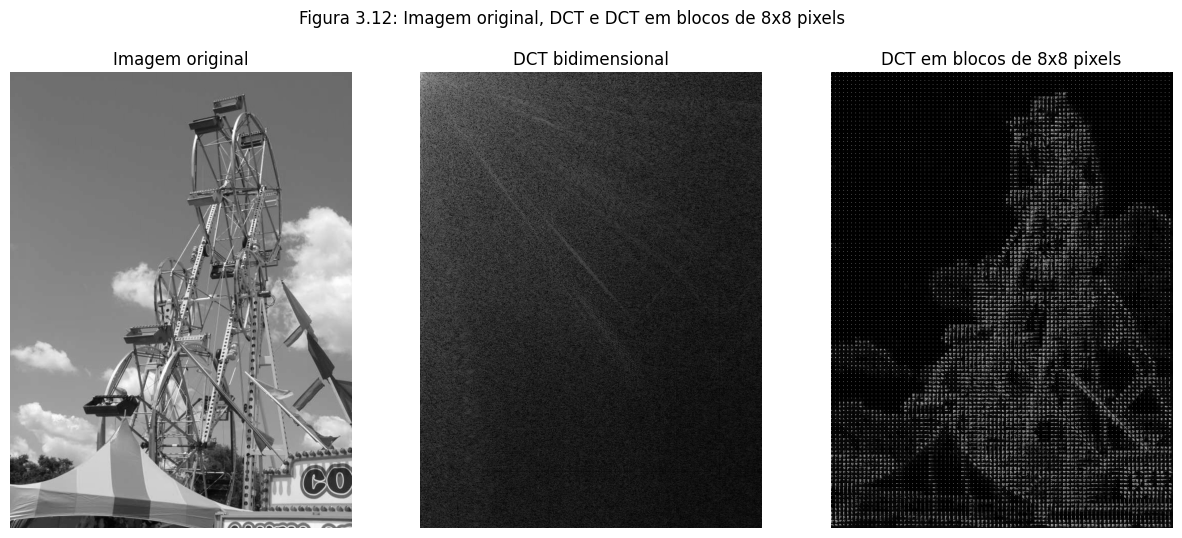

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].imshow(M, cmap='gray');ax[0].axis("off")
ax[0].set_title("Imagem original")
ax[1].imshow(Nlog / np.amax(Nlog), cmap='gray');ax[1].axis("off")
ax[1].set_title("DCT bidimensional")
ax[2].imshow(NBAKlog / np.amax(Nlog), cmap='gray');ax[2].axis("off")
ax[2].set_title("DCT em blocos de 8x8 pixels")
fig.suptitle("Figura 3.12: Imagem original, DCT e DCT em blocos de 8x8 pixels");plt.show()

**Observação:** Na DCT em blocos é possível perceber uma espécie de silhueta da figura original: isso se deve principalmente porque cada bloco $8\times 8$ contém as componentes dc, que refletem o nível médio de amplitude do trecho correspondente da imagem.

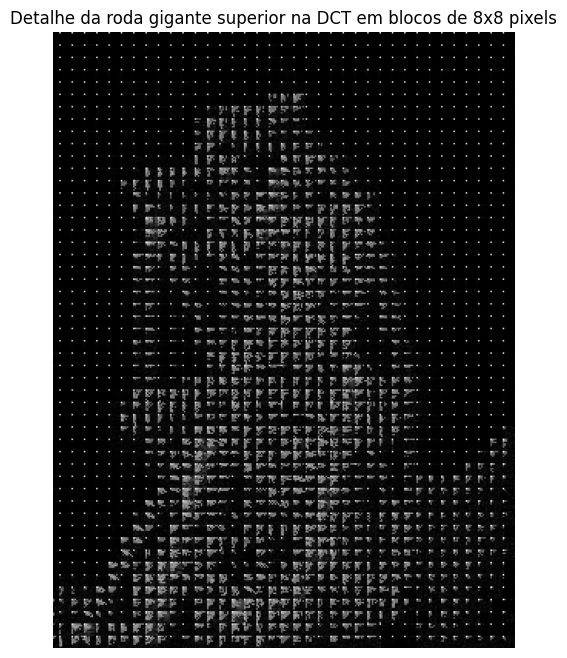

In [6]:
plt.figure(figsize=(10,8));plt.axis("off")
plt.imshow(np.log(1+abs(NBAK[0:400,300:600]))/np.amax(Nlog), cmap='gray')
plt.title("Detalhe da roda gigante superior na DCT em blocos de 8x8 pixels")
plt.show()

### DCT em blocos agrupados por frequência

Outra organização possível da DCT em blocos é agrupar os coeficientes de todos os blocos por pares de frequência $k,l=0,1,\ldots,7$. Nesse caso, a matriz resultante possui 64 blocos $\tilde{B}^{(k,l)}$ de tamanho $\frac{m}{8}\times\frac{n}{8}$:

\begin{equation*}
	\tilde{B} = \begin{pmatrix}
		\tilde{B}^{(0,0)} & \tilde{B}^{(0,1)} & \dots &  \tilde{B}^{(0,7)} \\
		\tilde{B}^{(1,0)} & \tilde{B}^{(1,1)} & \dots &  \tilde{B}^{(1,7)} \\
		\vdots & \vdots & \ddots & \vdots \\
		\tilde{B}^{(7,0)} & \dots & \dots & \tilde{B}^{(7,7)}
	\end{pmatrix}
\end{equation*}
onde
$$\left(\tilde{B}^{(k,l)}\right)_{i,j} = \left(\hat{B}^{(i,j)}\right)_{k,l}.$$

In [12]:
# Reordena a DCT em blocos para juntar os coeficientes correspondentes a uma mesma frequência (j,k)
NOVO = np.empty(NBAK.shape)
Ny,Nx = NOVO.shape
by = Ny // blksize
bx = Nx // blksize

for j in range(blksize):
    for k in range(blksize):
        NOVO[ j*by : (j+1)*by , k*bx : (k+1)*bx ] = NBAK[j:Ny:blksize, k:Nx:blksize]

NOVOlog = np.log(1 + abs(NOVO))

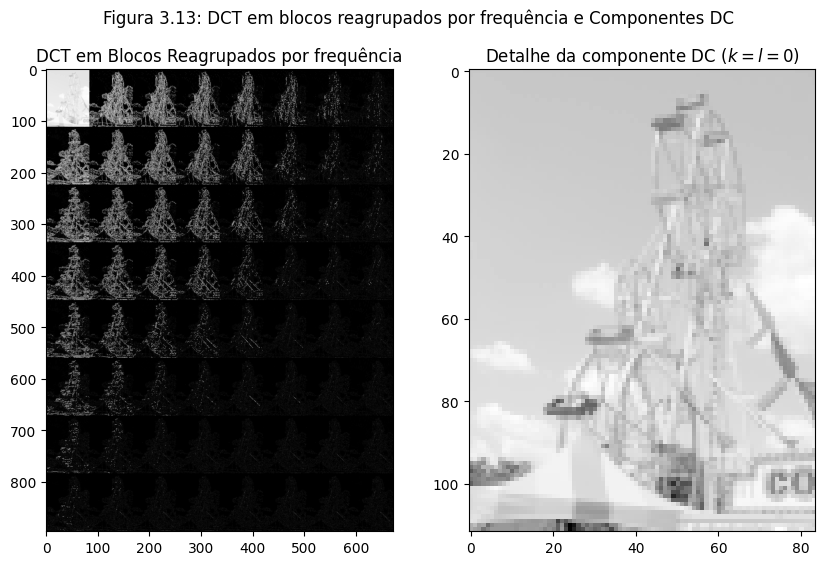

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(NOVOlog / np.amax(Nlog), cmap='gray')
ax[0].set_title("DCT em Blocos Reagrupados por frequência")
ax[1].imshow(np.log(1 + abs( NOVO[0:Ny//blksize, 0:Nx//blksize] )) / np.amax(Nlog), cmap='gray')
ax[1].set_title("Detalhe da componente DC ($k=l=0$)")
fig.suptitle("Figura 3.13: DCT em blocos reagrupados por frequência e Componentes DC")
plt.show()